    Sales  Profit         Region Product Category
0  405.81  -87.43  South America        Furniture
1  953.18  154.56           Asia  Office Supplies
2  745.39   25.74  North America        Furniture
3  618.73  103.43  South America       Technology
4  198.22  263.03  South America        Furniture
     Sales  Profit         Region Product Category
95  519.11   39.68  South America  Office Supplies
96  546.60  190.38         Europe        Furniture
97  456.16  258.84         Europe       Technology
98   74.15  254.83           Asia       Technology
99  152.50  211.95  North America       Technology
Shape: (100, 4)
Data types:
 Sales               float64
Profit              float64
Region               object
Product Category     object
dtype: object
Missing values:
 Sales               0
Profit              0
Region              0
Product Category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       

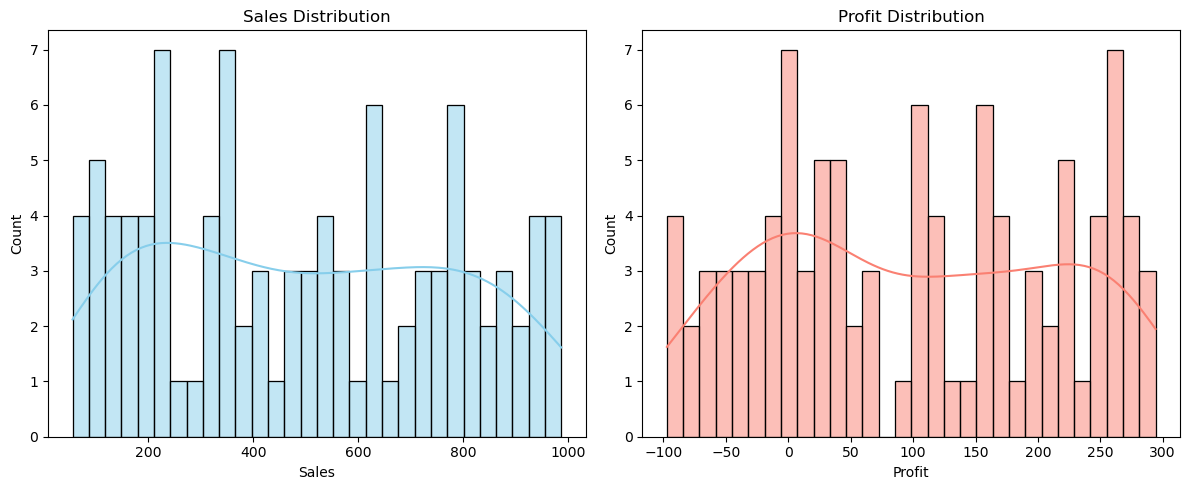

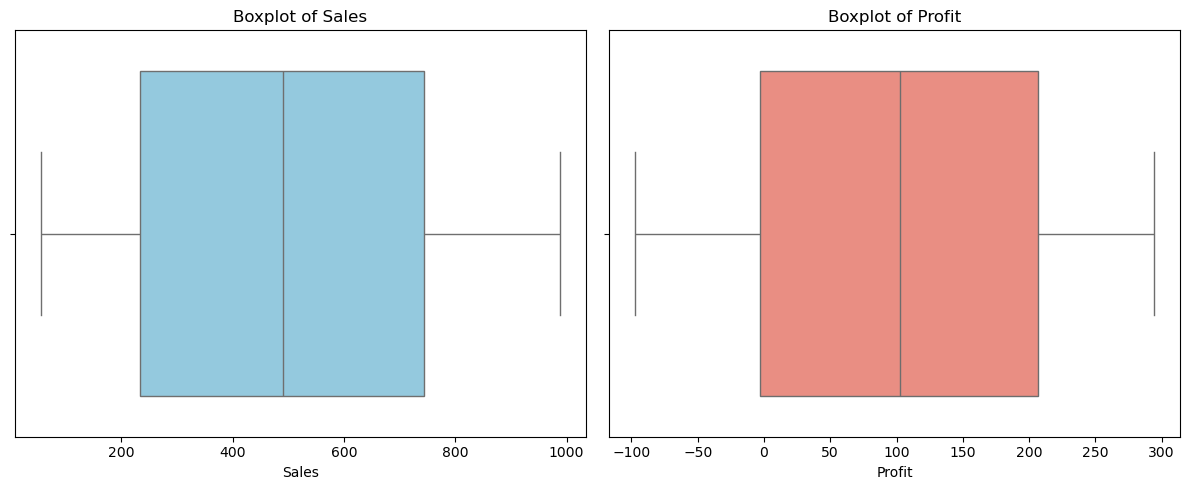

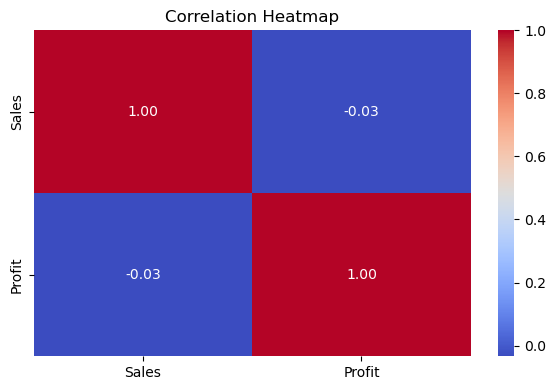

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (use raw string for Windows file path)
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\New folder\global_superstore_sample.csv")

# View basic info
print(data.head())
print(data.tail())
print("Shape:", data.shape)
print("Data types:\n", data.dtypes)
print("Missing values:\n", data.isnull().sum())
data.info()

# Filling missing values (no 'Date' column used)
data['Sales'] = data['Sales'].fillna(data['Sales'].mean())
data['Profit'] = data['Profit'].fillna(data['Profit'].mean())
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])
data['Product Category'] = data['Product Category'].fillna(data['Product Category'].mode()[0])

# Removing duplicates
data.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", data.shape)

# Outlier removal using IQR
for col in ['Sales', 'Profit']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

# Statistical summary
print("\nMean:\n", data[['Sales', 'Profit']].mean())
print("\nMedian:\n", data[['Sales', 'Profit']].median())
print("\nStandard Deviation:\n", data[['Sales', 'Profit']].std())
print("\nVariance:\n", data[['Sales', 'Profit']].var())

# Correlation matrix
correlation_matrix = data[['Sales', 'Profit']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Sales'], kde=True, bins=30, color='skyblue')
plt.title('Sales Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Profit'], kde=True, bins=30, color='salmon')
plt.title('Profit Distribution')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Sales'], color='skyblue')
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Profit'], color='salmon')
plt.title('Boxplot of Profit')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
